This tutorial demonstrates how to mask the borders of an image, which is particularly useful for images created from drizzled or stacked exposures. Commonly due to dithered observations, these images often exhibit excess noise along the edges due to reduced exposure in these areas. Masking the borders helps in source detection by preventing false identifications caused by this noise.

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Border masking function
from mask_borders import mask_borders

# Create simulated image

Create a simple simulated image of 1s and NaNs. The 1s represent image data, and the NaNs represent no-data regions.

In [2]:
# Define function to rotate the array of 1s
def rotate(origin, point, theta):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    
    Taken from this post:
    https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python
    """
    ox, oy = origin
    px, py = point
    
    angle = np.deg2rad(theta)

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)
    return qx, qy

# Create a large square array of zeros
N = 300  # Dimension of the large square
large_square = np.zeros((N, N))

# Define the smaller square
s = 200  # Side length of the small square

# Create simulated science exposure
# There will be two square exposures, offset by 30 deg
for theta in [30,60]:

    # Calculate the center of the large square
    center_x, center_y = N // 2, N // 2

    # Generate x and y indices
    y_indices, x_indices = np.indices((N, N))

    # Rotate coordinates
    x_rotated, y_rotated = rotate((center_x, center_y), (x_indices, y_indices), theta)

    # Create mask for rotated square
    inside_rotated_square = ((x_rotated >= center_x - s//2) & (x_rotated < center_x + s//2) &
                             (y_rotated >= center_y - s//2) & (y_rotated < center_y + s//2))

    # Apply mask
    large_square[inside_rotated_square] = 1
    
large_square[large_square == 0] = np.nan

Plot the simulated image:

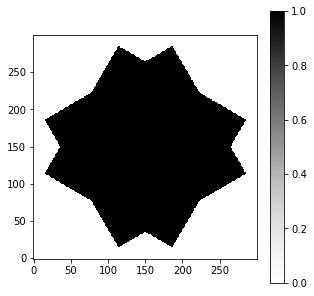

In [3]:
fig, ax = plt.subplots(figsize = (5,5))

cs = ax.imshow(large_square, cmap = 'Greys', origin = 'lower', vmin = 0, vmax = 1)

plt.colorbar(cs)

# Mask borders

Apply the *mask_borders* function to mask the border of the image. The border length will be 20 pixels. This function masks the borders row by row and column by column, which may result in a jagged appearance of the masked areas.

**Important**: The no-data regions of the image must be set to NaN for this function to work.

In [4]:
masked_image = mask_borders(large_square, border = 20)

# Plot the result

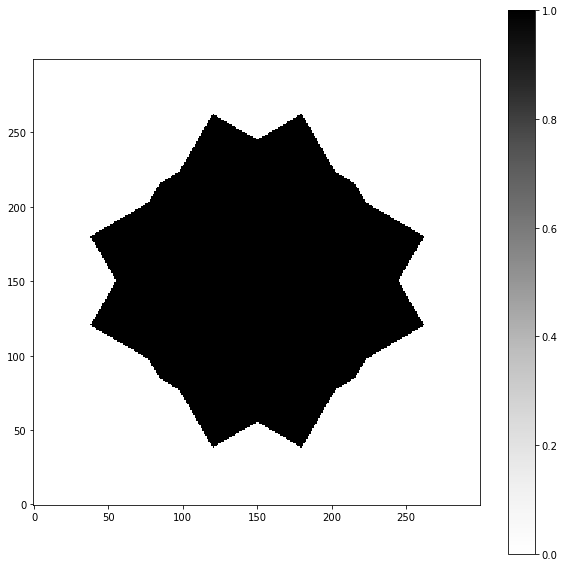

In [5]:
fig, ax = plt.subplots(figsize = (10,10))

cs = ax.imshow(masked_image, cmap = 'Greys', origin = 'lower', vmin = 0, vmax = 1)

plt.colorbar(cs)